#### OFM3 — OFM3 TASK 2: DIMENSIONALITY REDUCTION METHODS

<ul>
<li>Ryan L. Buchanan</li>
<li>Student ID:  001826691</li>
<li>Masters Data Analytics (12/01/2020)</li>
<li>Program Mentor:  Dan Estes</li>
<li>385-432-9281 (MST)</li>
<li>rbuch49@wgu.edu</li>
</ul>

#### Scenario 1
One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to perform a market basket analysis to analyze customer data to identify key associations of your customer purchases, ultimately allowing better business and strategic decision-making.

#### Part I: Research Question

#### <span style="color:green"><b>A1. Proposal of Question</b>:</span>
Which principal variables of our customers demonstrate that they are at high risk of churn?  And, therefore, which customers' features indicate relationship that might help identify customers that may potentially churn?  This question will be answered using principal component analysis (PCA).
<br>In other words, though we are not using a supervised learning model, such as linear regression, trying to make prediction, we are trying to better understand the relationships between customer features in order to inform stakeholder decisions.


#### <span style="color:green"><b>A2. Defined Goal</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are at highest risk of churn because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.
The goal of this data analysis is to present numerical values to company stakeholders to help them better understand their customers and the principal components that cause customer churn.

#### Part II: Technique Justification
B.  Explain the reasons for using PCA by doing the following:

#### <span style="color:green"><b>B1. Explanation of of PCA</b>:</span>
<span style="color:red">Explain how PCA analyzes the selected data set. Include expected outcomes.</span>

<span style="color:orange">(SuperDataScience)</span>

#### <span style="color:green"><b>B2. PCA Assumption</b>:</span>
<span style="color:red">Summarize one assumption of PCA.</span>

<span style="color:orange">(Grant, p. 1)</span>.

#### Part III: Data Preparation
C.  Perform data preparation for the chosen dataset by doing the following:

#### <span style="color:green"><b>C1. Continuous Dataset Variables</b>:</span>
In cleaning the data, we may discover relevance of the continuous predictor variables:
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts    
* Yearly_equip_failure
* Tenure (the number of months the customer has stayed with the provider)
* MonthlyCharge
* Bandwidth_GB_Year    

Our target variable for all of these analyses is Churn. Churn is a binary (yes/no) variable.  So will accordingly encode it with dummy variables (1/0). 

In [32]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

# Import Scipy for feature scaling
import scipy
from scipy.cluster.vq import whiten

In [27]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [28]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [29]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('data/churn_clean.csv', index_col=0)

In [ ]:
# Examine the features of the dataset
churn_df.columns

In [ ]:
# Get an idea of dataset size
churn_df.shape

In [ ]:
# Examine first few records of dataset
churn_df.head()

In [ ]:
# View DataFrame info
churn_df.info

In [ ]:
# Provide an initial look at extant dataset
churn_df.head()

In [ ]:
# Get an overview of descriptive statistics
churn_df.describe()

In [ ]:
# Get data types of features
churn_df.dtypes

In [ ]:
# Encode binary categorical variable with dummies
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']] ### If the customer left (churned) they get a '1'

In [ ]:
# Drop original binary categorical feature from dataframe
churn_df = churn_df.drop(columns=['Churn'])

In [ ]:
# Remove less meaningful non-numerical categorical variables from dataset to provide fully numerical dataframe
churn_df = churn_df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 
                                  'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 
                                  'Job', 'Marital', 'PaymentMethod', 'Gender', 'Techie', 
                                  'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                                  'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 
                                  'Item8'])

In [ ]:
# Move DummyChurn to end of dataset to set as target
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyChurn']]

In [ ]:
churn_df.head()

In [ ]:
# Examine the features of the dataset
churn_df.columns

In [ ]:
# Create histograms of contiuous variables & categorical variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year', 'DummyChurn']].hist()
plt.tight_layout()

In [36]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

In [ ]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Outage_sec_perweek'], color='blue')
plt.show();

In [ ]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['DummyChurn'], color='blue')
plt.show();

In [ ]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

In [ ]:
# P# Provide a scatter matrix of numeric variables for high level overview of potential relationships & distributions
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                          'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 
                          'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyChurn']]


scatter_matrix = pd.plotting.scatter_matrix(
    churn_numeric,
    figsize  = [15, 15],
    diagonal = "kde",
    color="b"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

In [ ]:
# Create multiple boxplots for continuous & categorical variables
churn_df.boxplot(column=['MonthlyCharge','Bandwidth_GB_Year'])

In [ ]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

In [ ]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

In [ ]:
# Create Seaborn boxplots for continuous variables
sns.boxplot('Tenure', data = churn_df)
plt.show()

#### Anomalies
It appears that anomolies have been removed from the supplied dataset, churn_clean.csv. &nbsp; There are no remaining outliers.

In [ ]:
# Discover missing data points within dataset
data_nulls = churn_df.isnull().sum()
print(data_nulls)

In [ ]:
# Check for missing data & visualize missing values in dataset 

# Install appropriate library
!pip install missingno

# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(churn_df);
"""(GeeksForGeeks, p. 1)"""

In [ ]:
churn_df.head()

In [ ]:
# List features for analysis
features = (list(churn_df.columns[:-1]))
print('Features for analysis include: \n', features)

In [ ]:
# Extract Clean dataset
churn_df.to_csv('data/churn_prepared_pca.csv')

#### <span style="color:green"><b>C2. Standardization of Dataset Variables</b>:</span>
<span style="color:red">Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.</span>

Initial dataset variables used to perform the analysis for the classification analysis identified & classified as continuous or categorical below.

#### <span style="color:orange"><b>Applying PCA w Hadelin</b></span>

In [31]:
# Load clean, prepared dataset
churn_df = pd.read_csv('data/churn_prepared_pca.csv')

#### <span style="color:orange"><b>Visualization of Feature Scaling</b></span>

In [33]:
# Scale the data with the Scipy whiten method
churn_df_scaled = whiten(churn_df)
print(churn_df_scaled)

[[3.46410163e-04 0.00000000e+00 3.28536593e+00 ... 4.01610890e+00
  4.13940178e-01 0.00000000e+00]
 [6.92820326e-04 4.65745993e-01 1.30448353e+00 ... 5.65037736e+00
  3.66551368e-01 2.26586167e+00]
 [1.03923049e-03 1.86298397e+00 2.41571024e+00 ... 3.72482664e+00
  9.40289454e-01 0.00000000e+00]
 ...
 [3.46340881e+00 4.65745993e-01 2.31908183e+00 ... 3.95832212e+00
  1.90341078e+00 0.00000000e+00]
 [3.46375522e+00 4.65745993e-01 1.88425399e+00 ... 5.88305611e+00
  2.96014068e+00 0.00000000e+00]
 [3.46410163e+00 4.65745993e-01 1.35279774e+00 ... 5.06472297e+00
  2.68058979e+00 0.00000000e+00]]


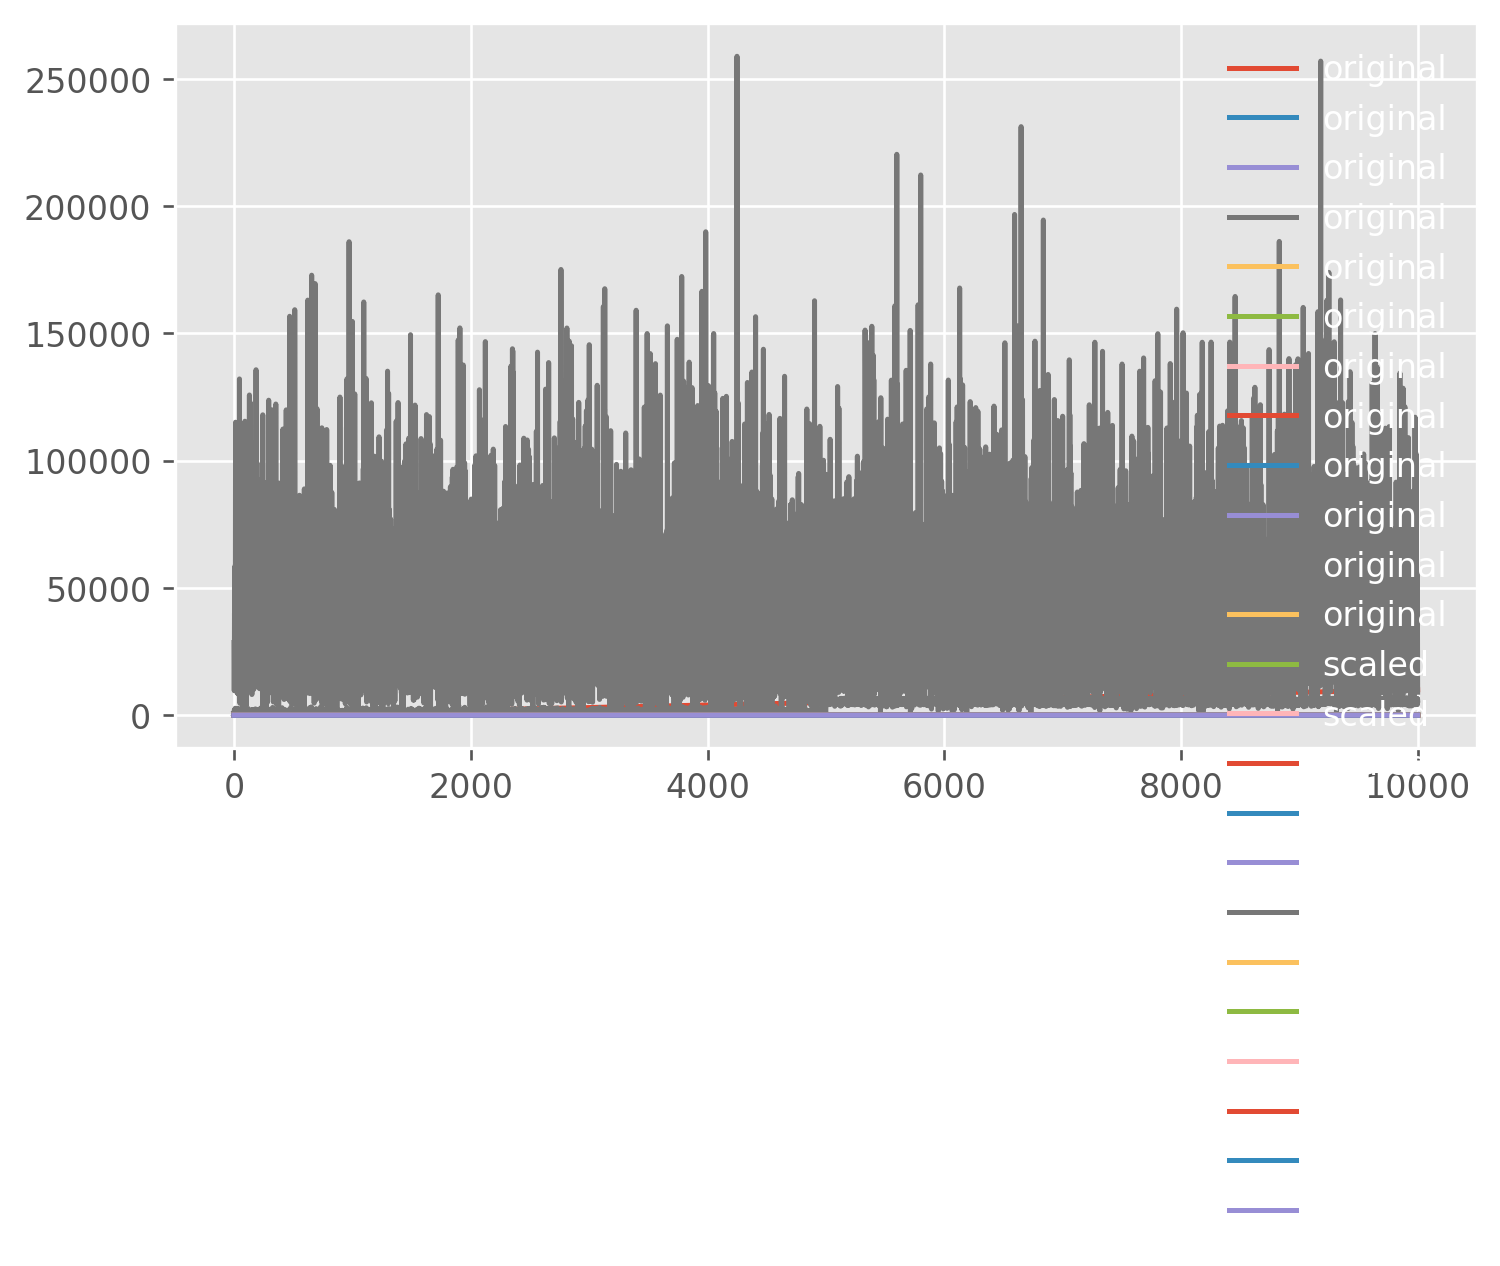

In [37]:
# Initialize original, scaled data
plt.plot(churn_df, 
        label="original")
plt.plot(churn_df_scaled,
        label="scaled")

# Show legend and display plot
plt.legend()
plt.show()

In [8]:
# Normalize the data
churn_standardized = (churn_df - churn_df.mean()) / churn_df.std()

In [9]:
churn_standardized.head()

,CaseOrder,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,DummyChurn
0,-1.731791,-0.972289,0.720889,-0.398758,-0.679944,-0.666248,-1.005801,0.946611,-1.048694,-0.003942,-1.138430,-0.600423
1,-1.731445,-0.506567,-1.259894,-0.641922,0.570303,-0.005288,-1.005801,0.946611,-1.261938,1.630244,-1.185817,1.665325
2,-1.731098,0.890602,-0.148723,-1.070831,0.252334,-0.996729,-1.005801,0.946611,-0.709904,-0.295210,-0.612107,-0.600423
3,-1.730752,-0.506567,-0.245347,-0.740488,1.650423,0.986153,1.017537,-0.625832,-0.659491,-1.226460,-0.561829,-0.600423
4,-1.730405,-0.972289,1.445566,0.009477,-0.623125,1.316634,1.017537,0.946611,-1.242489,-0.528059,-1.428113,1.665325


In [10]:
# Create a list of PCA names
churn_numeric = churn_standardized[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                      'Email', 'Contacts','Yearly_equip_failure', 
                      'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


In [11]:
# Select number of components to extract
pca = PCA(n_components = churn_standardized.shape[1])

In [20]:
# Call PCA application & convert the dataset of 11 variables into a dataset of 11 components
pca.fit(churn_standardized)
churn_pca = pd.DataFrame(pca.transform(churn_standardized),
                        columns = pcs_names)

ValueError: Shape of passed values is (10000, 12), indices imply (10000, 10)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


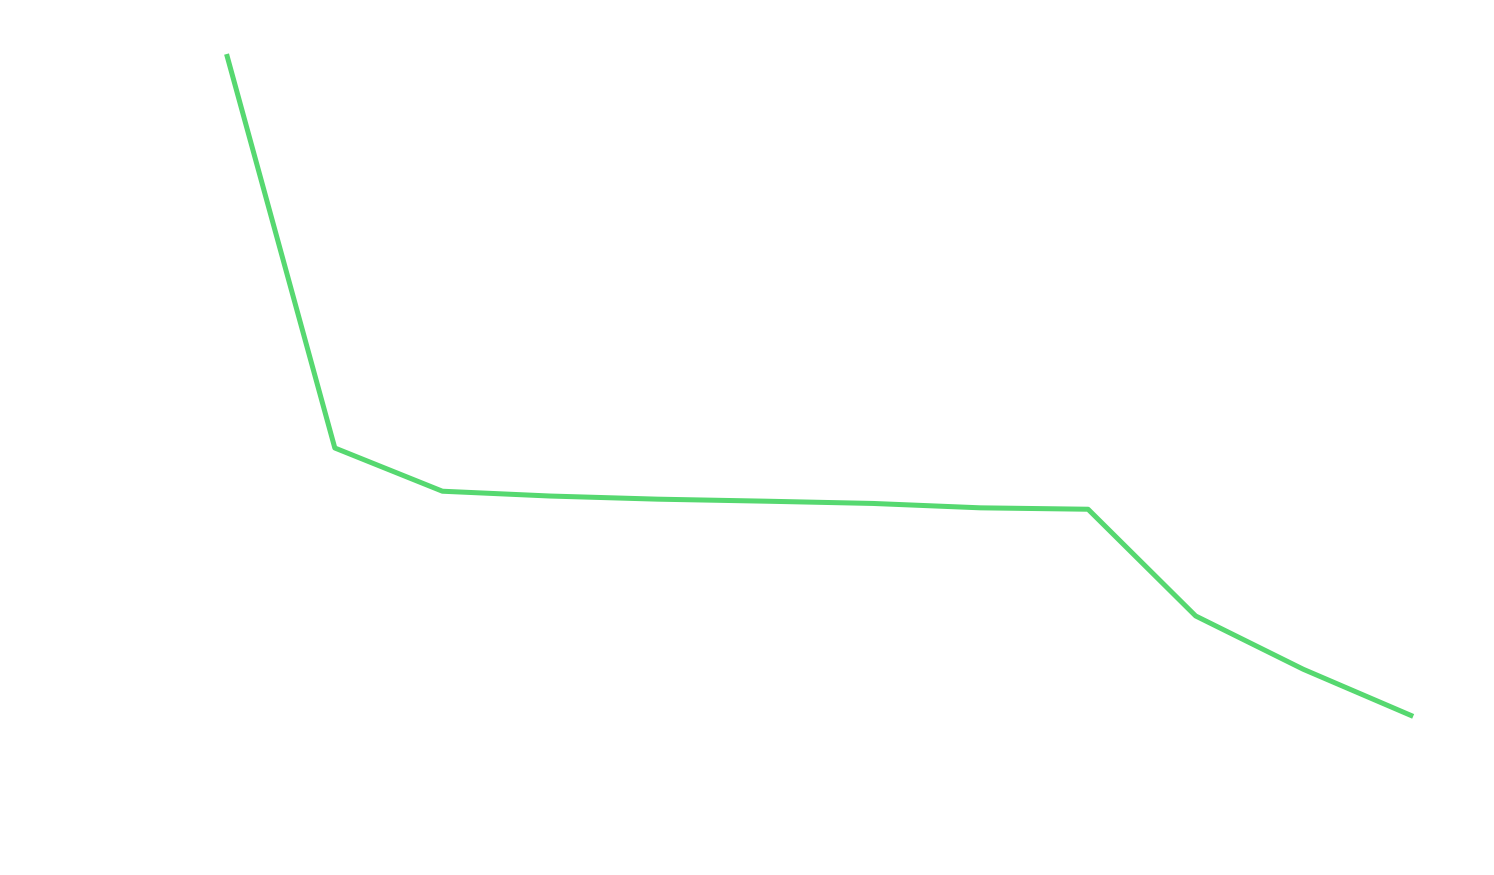

In [13]:
# Run the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

In [15]:
# Extract the eigenvalues
cov_matrix = np.dot(churn_standardized.T, churn_standardized) / churn_standardized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) 
               for eigenvector in pca.components_]

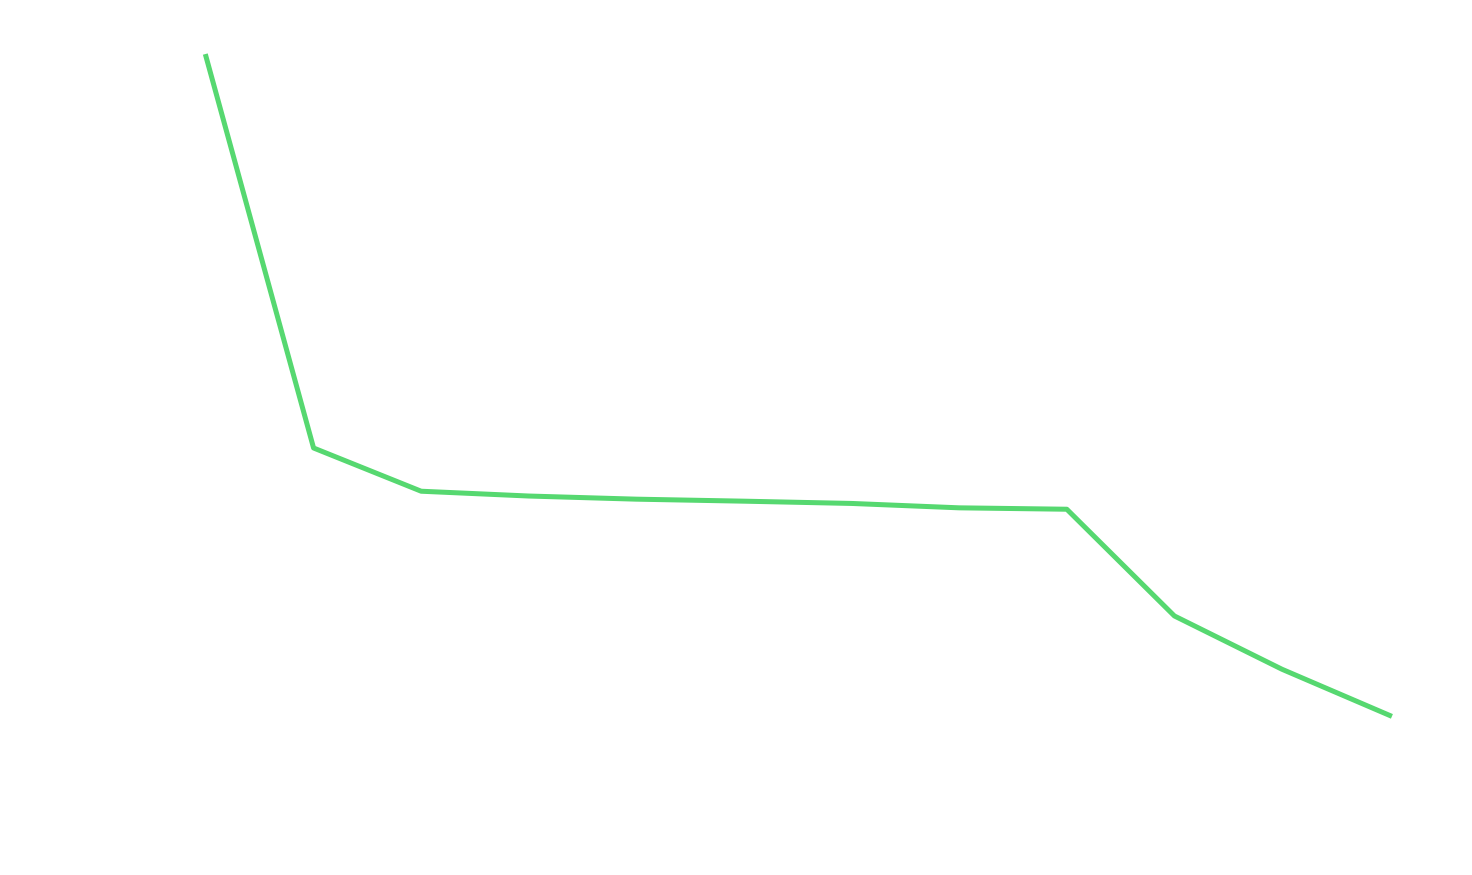

In [16]:
# Plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

In [17]:
# Select the fewest components 
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.2553465471831592
PC2 0.3592289790742713
PC3 0.446382288174873
PC4 0.5316777017648416
PC5 0.6157576155991926
PC6 0.6990611187872734
PC7 0.7814860752697727
PC8 0.8622140901138052
PC9 0.9423977914852644
PC10 0.9812972018168936


In [21]:
# Above, we see that 86% of variance is explained by 7 components
# Create a rotation 
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = churn_numeric.columns)
print(rotation)

ValueError: Shape of passed values is (12, 12), indices imply (10, 10)

In [24]:
# Output loadings for components
loadings = pd.DataFrame(pca.components_.T,
                       columns = pcs_names,
                       index = churn_numeric.columns)
loadings

ValueError: Shape of passed values is (12, 12), indices imply (10, 10)

In [25]:
# Finally, extract reduced dataset & print 3 components
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

NameError: name 'churn_pca' is not defined

#### Part IV: Analysis
D. Perform PCA by doing the following:

In [ ]:
# Re-read fully numerical prepared dataset
churn_df = pd.read_csv('data/churn_prepared_pca.csv')

# Set predictor features & target variable
X = churn_df.drop('DummyChurn', axis=1).values
y = churn_df['DummyChurn'].values

In [ ]:
# Import model, splitting method & metrics from sklearn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, train_test_split

#### <span style="color:green"><b>D1. Principal Components</b></span>
<span style="color:red">Determine the matrix of all the principal components.</span>

In [ ]:
# Set seed for reproducibility
SEED = 1

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
# Instantiate KNN model 
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit data to KNN model
knn.fit(X_train, y_train)

# Predict outcomes from test set
y_pred = knn.predict(X_test)

#### <span style="color:green"><b>D2. Identification of Total Number of Components</b></span>
<span style="color:red">Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.</span>

#### <span style="color:green"><b>D3. Total Variance of Components</b></span>
<span style="color:red">Identify the variance of each of the principal components identified in part D2.</span>

#### <span style="color:green"><b>D4. Total Variance Captured by Components</b></span>
<span style="color:red">Identify the total variance captured by the principal components identified in part D2.</span>

#### <span style="color:green"><b>D5. Summary of Data Analysis</b></span>
<span style="color:red">Summarize the results of your data analysis.</span>

It is critical that decision-makers & marketers understand that our predictor variables create a relatively low accuracy score with the results of an 0.84 after scaling.   We should analyse the features that are in common among those leaving the company & attempt to reduce their likelihood of occuring with any given customer in the future.   This suggests that as a customer subscribes to more services that the company provided, an additional port modem or online backup for example, they are less likely to leave the company.   Clearly, it is the best interest of retaining customers to provide them with more services & improve their experience with the company by helping customers understand all the services that are available to them as a subscriber, not simple mobile phone service.

In [ ]:
# Print initial accuracy score of KNN model
print('Initial accuracy score KNN model: ', accuracy_score(y_test, y_pred))

In [ ]:
# Compute classification metrics
print(classification_report(y_test, y_pred))

In [ ]:
# Create pipeline object & scale dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [ ]:
# Print new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

In [ ]:
# Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

In [ ]:
# Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
# Create a visually more intuitive confusion matrix
"""(Dennis, pg. 1)"""
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### Model Comparison
It appears that scaling improved model performance from an <b>Accuracy</b> of 0.71 to 0.79 & <b>Precision</b> of 0.78 to 0.84. The area under the curve is a decent score at 0.7959.

In [ ]:
# Import GridSearchCV for cross validation of model
from sklearn.model_selection import GridSearchCV

# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Re-intantiate KNN for cross validation
knn = KNeighborsClassifier()

# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)

# Fit model to 
knn_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

In [ ]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

In [ ]:
# Import ROC AUC metrics for explaining the area under the curve
from sklearn.metrics import roc_auc_score

# Fit it to the data
knn_cv.fit(X, y)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

In [ ]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

#### <span style="color:green"><b> E. Sources for Third-Party Code</b></span>
* GeeksForGeeks. &ensp; (2019, July 4). &ensp; <i>Python | Visualize missing values (NaN) values using Missingno Library</i>. &ensp; GeeksForGeeks. &ensp; https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
<br>
* Dennis, T. &ensp; (2019, July 25). &ensp; <i>Confusion Matrix Visualization</i>. &ensp; Medium. &ensp; https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
<br>
* SuperDataScience. &ensp; (2021, August 15) &ensp; <i>Machine Learning A-Z: Hands-On Python & R in Data Science</i>. &ensp; https://www.superdatascience.com/

#### <span style="color:green"><b> F. Sources</b></span>
* CBTNuggets. &ensp; (2018, September 20). &ensp; <i>Why Data Scientists Love Python</i>. &ensp; CBTNuggets. &ensp; https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python
<br> 
* Massaron, L. & Boschetti, A. &ensp; (2016). &ensp; <i>Regression Analysis with Python</i>. &ensp; Packt Publishing.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('OFM3_OFM3_TASK_2_DIMENSIONALITY_REDUCTION_METHODS.ipynb')